# Imports

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from re import VERBOSE

# Data

In [30]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# The dataset is divided into two tuples for training and test data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


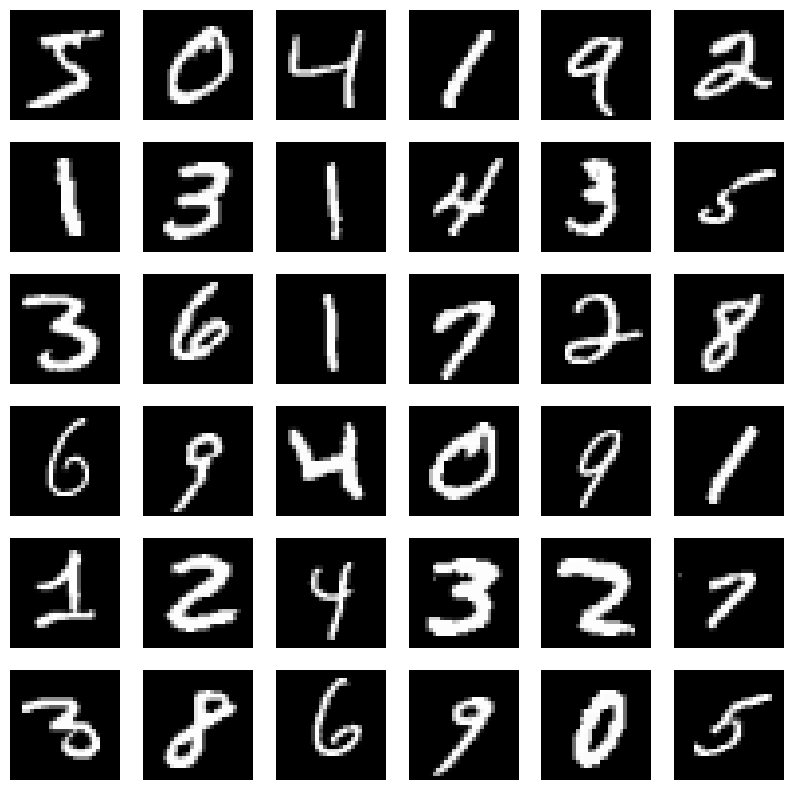

In [32]:
plt.figure(figsize = (10,10))
for i in range(36):
 plt.subplot(6,6,i+1)
 plt.axis('off')
 plt.imshow(train_images[i], cmap = 'gray')

In [33]:
train_images = train_images.reshape([60000,28,28,1])

In [34]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [35]:
# Make the y_train one-hot encoded
train_labels = to_categorical(train_labels, num_classes = 10)

In [36]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


In [37]:
# Split the training data into train and val datasets
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [38]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 15,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

train_datagen.fit(x_train_np)
train_generator = train_datagen.flow(x_train, y_train, batch_size=64)

In [39]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen.fit(x_val_np)
val_generator = val_datagen.flow(x_val, y_val, batch_size=64, shuffle=False)

# Model

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax') # 10 for the 10 numbers
])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)         

In [42]:
# from tensorflow.keras.optimizers import SG
optimizer = tf.keras.optimizers.legacy.SGD()
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [43]:
# Early stopping to prevent the model from overfitting on the training dataset
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/50
750/750 [==============================] - 10s 13ms/step - loss: 2.2814 - accuracy: 0.1545 - val_loss: 2.1931 - val_accuracy: 0.4263
Epoch 2/50
750/750 [==============================] - 9s 13ms/step - loss: 2.1550 - accuracy: 0.2374 - val_loss: 1.6041 - val_accuracy: 0.6224
Epoch 3/50
750/750 [==============================] - 10s 13ms/step - loss: 1.7805 - accuracy: 0.3789 - val_loss: 0.9905 - val_accuracy: 0.7529
Epoch 4/50
750/750 [==============================] - 10s 13ms/step - loss: 1.4475 - accuracy: 0.5025 - val_loss: 0.6856 - val_accuracy: 0.8212
Epoch 5/50
750/750 [==============================] - 10s 13ms/step - loss: 1.2307 - accuracy: 0.5819 - val_loss: 0.5457 - val_accuracy: 0.8512
Epoch 6/50
750/750 [==============================] - 11s 14ms/step - loss: 1.0957 - accuracy: 0.6338 - val_loss: 0.4451 - val_accuracy: 0.8765
Epoch 7/50
750/750 [==============================] - 10s 13ms/step - loss: 1.0021 - accuracy: 0.6664 - val_loss: 0.3732 - val_accuracy: 

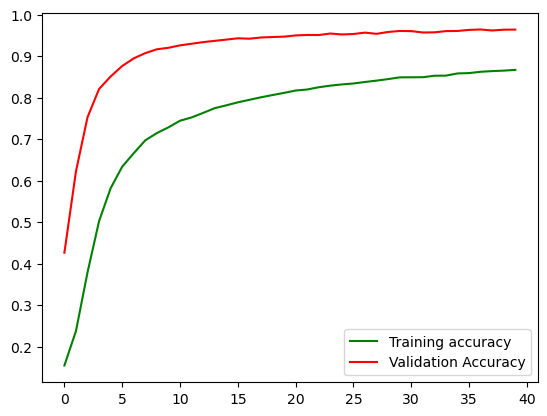

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc, color = 'green', label = 'Training accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.legend()

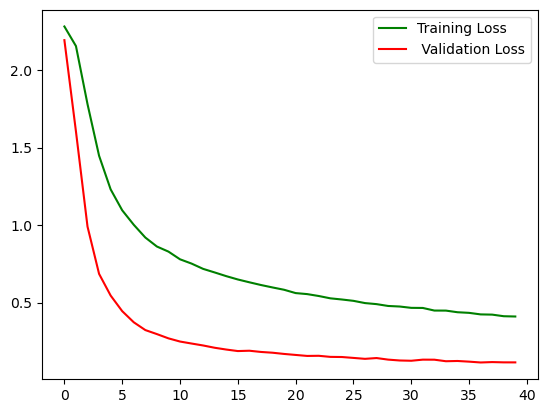

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, color = 'green', label = 'Training Loss')
plt.plot(val_loss, color = 'red', label = ' Validation Loss')
plt.legend()

# Evaluate

In [69]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28, 1)
(10000, 10)


In [72]:
x_test = test_images.reshape([10000,28,28,1])

In [73]:
y_test = to_categorical(test_labels, num_classes = 10)

In [74]:
test_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen.fit(test_images)
test_generator = test_datagen.flow(x_test, y_test, batch_size=64, shuffle=False)

In [75]:
predictions = model.predict(test_generator, steps=len(test_generator))

y_preds = np.argmax(predictions, axis=1)
y_true = np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_true, y_preds)

157/157 [==============================] - 1s 3ms/step


In [76]:
accuracy = np.trace(cm) / np.sum(cm)
print(f"Accuracy: {round(accuracy*100,2)}%")

Accuracy: 96.91%


In [77]:
classes = [0,1,2,3,4,5,6,7,8,9]

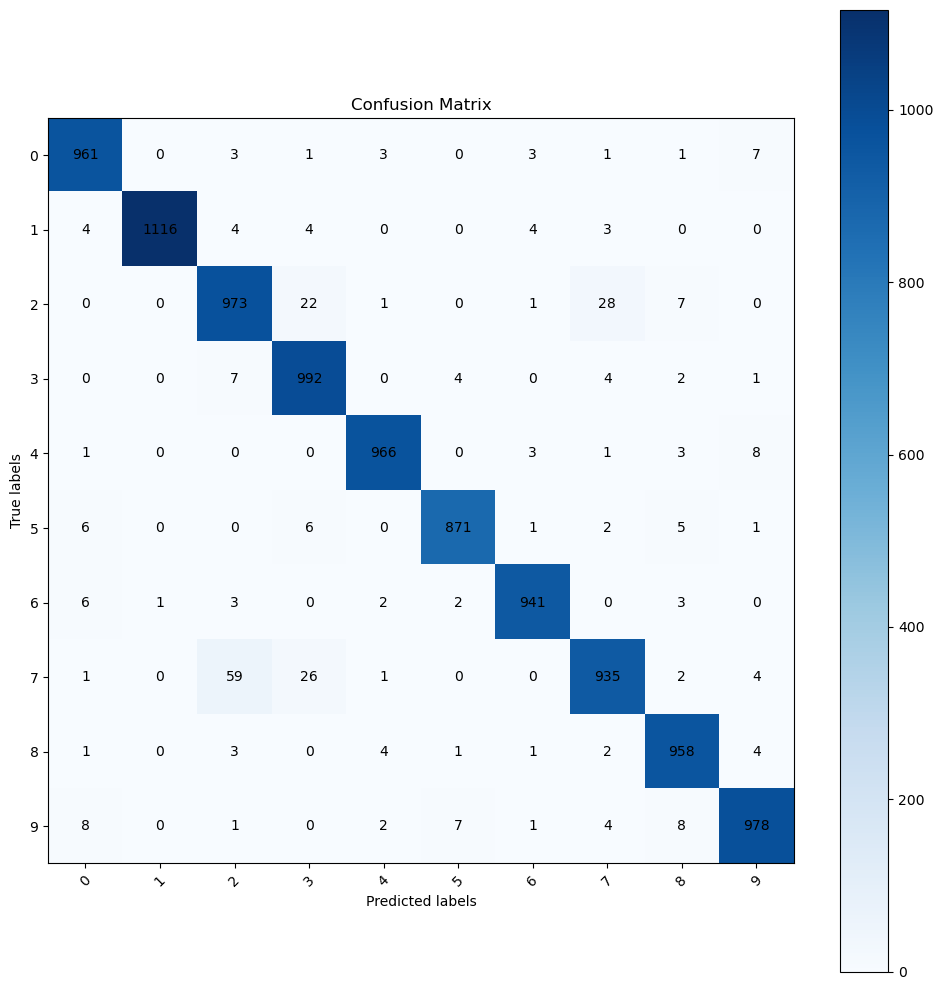

In [78]:
plt.figure(figsize=(10, 10))

plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()